In [14]:
from cartopy.io import shapereader


ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [3]:
#importing neccesary modules
import xarray as xr
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature


In [4]:
from metpy.cbook import get_test_data

In [6]:
#opening  the dataset
ds = xr.open_dataset("C:/CDT/Rainfall_Climatology/CHIRPSv2_monthly/Extracted/chirps_199105.nc")
ds

<xarray.Dataset>
Dimensions:  (lon: 610, lat: 710)
Coordinates:
  * lon      (lon) float64 21.53 21.58 21.63 21.68 ... 51.83 51.88 51.93 51.98
  * lat      (lat) float64 -11.98 -11.93 -11.88 -11.83 ... 23.37 23.42 23.47
Data variables:
    precip   (lat, lon) float32 ...

In [7]:
#reading the variable
data_var = ds.metpy.parse_cf('precip')
data_var

<xarray.DataArray 'precip' (lat: 710, lon: 610)>
[433100 values with dtype=float32]
Coordinates:
  * lon        (lon) float64 21.53 21.58 21.63 21.68 ... 51.83 51.88 51.93 51.98
  * lat        (lat) float64 -11.98 -11.93 -11.88 -11.83 ... 23.37 23.42 23.47
    metpy_crs  object Projection: latitude_longitude
Attributes:
    units:      mm
    long_name:  Rainfall Estimate

In [8]:
#reading the latitudes and longitudes
latitudes = ds['lat']  # Replace with the correct name
longitudes = ds['lon']  # Replace with the correct name
variable = ds['precip']  # Replace with the correct variable name from the dataset


In [15]:
# importing the shapefile
shapefile_path = ("C:/CDT/GHA.shp")
shapefile = gpd.read_file("C:/CDT/GHA.shp")


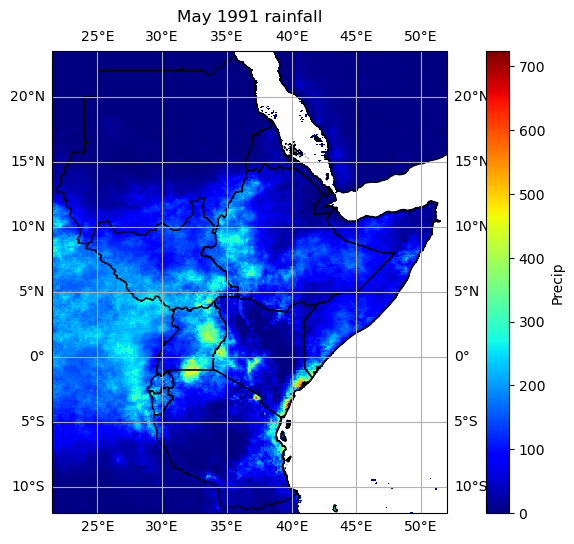

In [31]:
#plotting
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
plt.pcolormesh(longitudes, latitudes, variable, cmap="jet", transform=ccrs.PlateCarree())
plt.colorbar(label='Precip')  # Customize the label based on your variable
ax.gridlines(draw_labels=True)
shapefile.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=1)

plt.title('May 1991 rainfall')
plt.show()
#what is remaining is 
# shapefile, changing the colors, averaging files, changing titles.